In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

In [64]:
movie = pd.read_csv('./dataset/movies.csv')

In [65]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [66]:
movie.shape

(9742, 3)

In [67]:
movie['movieId'].nunique()

9742

In [68]:
movie.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [69]:
ratings = pd.read_csv('./dataset/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [70]:
ratings.shape

(100836, 4)

In [71]:
ratings['movieId'].nunique()

9724

In [72]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [73]:
ratings = ratings.drop(columns=['userId'])

In [74]:
ratings.head()

,movieId,rating,timestamp
0,1,4.0,964982703
1,3,4.0,964981247
2,6,4.0,964982224
3,47,5.0,964983815
4,50,5.0,964982931


In [75]:
links = pd.read_csv('./dataset/links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [76]:
links.shape

(9742, 3)

In [77]:
links['movieId'].nunique()

9742

In [78]:
links.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [79]:
tags = pd.read_csv('./dataset/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [80]:
tags.shape

(3683, 4)

In [81]:
tags['movieId'].nunique()

1572

In [82]:
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [83]:
dataset = movie.merge(ratings, on='movieId', how='inner')
dataset = dataset.merge(tags, on='movieId', how='inner')

In [84]:
dataset.head()

,movieId,title,genres,rating,timestamp_x,userId,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,847434962,474,pixar,1137206825


In [85]:
dataset.drop(columns=['timestamp_x', 'timestamp_y'], axis=1)

,movieId,title,genres,rating,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,336,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,474,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,567,fun
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,336,pixar
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,474,pixar
...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,5.0,62,star wars
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,3.5,184,anime
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,3.5,184,comedy
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,3.5,184,gintama


In [86]:
average_rating = dataset.groupby(by='title')['rating'].mean().to_frame().reset_index()

In [87]:
average_rating

,title,rating
0,(500) Days of Summer (2009),3.666667
1,...And Justice for All (1979),3.166667
2,10 Cloverfield Lane (2016),3.678571
3,10 Things I Hate About You (1999),3.527778
4,101 Dalmatians (1996),3.074468
...,...,...
1549,Zero Dark Thirty (2012),4.107143
1550,Zombieland (2009),3.877358
1551,Zoolander (2001),3.509259
1552,Zulu (1964),4.000000


In [88]:
dataset = dataset.merge(average_rating, on='title', how='inner')

In [89]:
dataset.shape

(233213, 9)

In [90]:
dataset.drop(columns=['timestamp_x', 'timestamp_y', 'rating_x'], axis=1, inplace=True)

In [91]:
dataset.rename(columns={'rating_y':'rating'}, inplace=True)

In [92]:
dataset[['genre_1','genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7']] = dataset['genres'].str.split('|', expand=True)

In [93]:
dataset.head()

,movieId,title,genres,userId,tag,rating,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,3.92093,Adventure,Animation,Children,Comedy,Fantasy,None,None
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,3.92093,Adventure,Animation,Children,Comedy,Fantasy,None,None
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,3.92093,Adventure,Animation,Children,Comedy,Fantasy,None,None
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,3.92093,Adventure,Animation,Children,Comedy,Fantasy,None,None
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,3.92093,Adventure,Animation,Children,Comedy,Fantasy,None,None


In [94]:
dataset.duplicated().sum()

229551

In [95]:
dataset.genre_1.unique()

array(['Adventure', 'Comedy', 'Drama', 'Crime', 'Mystery', 'Children',
       'Action', 'Documentary', 'Thriller', 'Animation', 'Romance',
       'Musical', 'Film-Noir', 'Horror', 'Sci-Fi', 'Fantasy', 'Western',
       '(no genres listed)'], dtype=object)

In [96]:
dataset.genre_2.unique()

array(['Animation', 'Children', 'Romance', None, 'Drama', 'Crime',
       'Sci-Fi', 'Comedy', 'War', 'Thriller', 'Mystery', 'Horror',
       'Adventure', 'Musical', 'Film-Noir', 'Fantasy', 'Western', 'IMAX',
       'Documentary'], dtype=object)

In [97]:
dataset.genre_3.unique()

array(['Children', 'Fantasy', None, 'Romance', 'Thriller', 'Horror',
       'Crime', 'Comedy', 'War', 'IMAX', 'Mystery', 'Sci-Fi', 'Drama',
       'Western', 'Musical', 'Film-Noir', 'Animation'], dtype=object)

In [98]:
all_genre = []
for i in dataset.genre_1.unique():
    all_genre.append(i)
print(all_genre)

['Adventure', 'Comedy', 'Drama', 'Crime', 'Mystery', 'Children', 'Action', 'Documentary', 'Thriller', 'Animation', 'Romance', 'Musical', 'Film-Noir', 'Horror', 'Sci-Fi', 'Fantasy', 'Western', '(no genres listed)']


In [99]:
for i in dataset.genre_2.unique():
    all_genre.append(i)

In [100]:
for i in dataset.genre_3.unique():
    all_genre.append(i)

In [101]:
for i in dataset.genre_4.unique():
    all_genre.append(i)

In [102]:
for i in dataset.genre_5.unique():
    all_genre.append(i)

In [103]:
for i in dataset.genre_6.unique():
    all_genre.append(i)

In [104]:
for i in dataset.genre_7.unique():
    all_genre.append(i)

In [105]:
print(all_genre)

['Adventure', 'Comedy', 'Drama', 'Crime', 'Mystery', 'Children', 'Action', 'Documentary', 'Thriller', 'Animation', 'Romance', 'Musical', 'Film-Noir', 'Horror', 'Sci-Fi', 'Fantasy', 'Western', '(no genres listed)', 'Animation', 'Children', 'Romance', None, 'Drama', 'Crime', 'Sci-Fi', 'Comedy', 'War', 'Thriller', 'Mystery', 'Horror', 'Adventure', 'Musical', 'Film-Noir', 'Fantasy', 'Western', 'IMAX', 'Documentary', 'Children', 'Fantasy', None, 'Romance', 'Thriller', 'Horror', 'Crime', 'Comedy', 'War', 'IMAX', 'Mystery', 'Sci-Fi', 'Drama', 'Western', 'Musical', 'Film-Noir', 'Animation', 'Comedy', None, 'Mystery', 'Romance', 'Musical', 'Crime', 'Sci-Fi', 'Thriller', 'War', 'Drama', 'Fantasy', 'Western', 'Horror', 'IMAX', 'Children', 'Fantasy', None, 'Thriller', 'Sci-Fi', 'Musical', 'Romance', 'Crime', 'War', 'Mystery', 'Comedy', 'IMAX', None, 'IMAX', 'Sci-Fi', 'Fantasy', 'Romance', 'War', 'Thriller', None, 'Mystery', 'IMAX']


In [106]:
fix_genre = set(all_genre)
print(fix_genre)

{'Drama', 'Musical', 'Fantasy', 'IMAX', 'War', 'Comedy', 'Action', 'Adventure', None, 'Animation', 'Western', 'Horror', 'Film-Noir', '(no genres listed)', 'Documentary', 'Thriller', 'Children', 'Romance', 'Crime', 'Mystery', 'Sci-Fi'}


In [107]:
dataset = dataset.drop(columns=['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7'], axis=1)

In [108]:
dataset.head()

,movieId,title,genres,userId,tag,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,3.92093
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,3.92093
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,3.92093
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,3.92093
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,3.92093


In [109]:
dataset['action'] = dataset['genres'].apply(lambda x: 1 if 'Action' in x else 0 )
dataset['film-noir'] = dataset['genres'].apply(lambda x: 1 if 'Film-Noir' in x else 0 )
dataset['imax'] = dataset['genres'].apply(lambda x: 1 if 'IMAX' in x else 0 )
dataset['crime'] = dataset['genres'].apply(lambda x: 1 if 'Crime' in x else 0 )
dataset['fantasy'] = dataset['genres'].apply(lambda x: 1 if 'Fantasy' in x else 0 )
dataset['children'] = dataset['genres'].apply(lambda x: 1 if 'Children' in x else 0 )
dataset['comedy'] = dataset['genres'].apply(lambda x: 1 if 'Comedy' in x else 0 )
dataset['musical'] = dataset['genres'].apply(lambda x: 1 if 'Musical' in x else 0 )
dataset['horror'] = dataset['genres'].apply(lambda x: 1 if 'Horror' in x else 0 )
dataset['animation'] = dataset['genres'].apply(lambda x: 1 if 'Animation' in x else 0 )
dataset['adventure'] = dataset['genres'].apply(lambda x: 1 if 'Adventure' in x else 0 )
dataset['mystery'] = dataset['genres'].apply(lambda x: 1 if 'Mystery' in x else 0 )
dataset['romance'] = dataset['genres'].apply(lambda x: 1 if 'Romance' in x else 0 )
dataset['documentary'] = dataset['genres'].apply(lambda x: 1 if 'Documentary' in x else 0 )
dataset['thriller'] = dataset['genres'].apply(lambda x: 1 if 'Thriller' in x else 0 )
dataset['war'] = dataset['genres'].apply(lambda x: 1 if 'War' in x else 0 )
dataset['sci-fi'] = dataset['genres'].apply(lambda x: 1 if 'Sci-Fi' in x else 0 )
dataset['drama'] = dataset['genres'].apply(lambda x: 1 if 'Drama' in x else 0 )
dataset['western'] = dataset['genres'].apply(lambda x: 1 if 'Western' in x else 0 )

In [110]:
dataset.head()

,movieId,title,genres,userId,tag,rating,action,film-noir,imax,crime,...,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,3.92093,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,3.92093,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,3.92093,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,3.92093,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,3.92093,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [111]:
dataset.head()

,movieId,title,genres,userId,tag,rating,action,film-noir,imax,crime,...,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,3.92093,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,3.92093,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,3.92093,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,3.92093,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,3.92093,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [112]:
df = dataset.copy()

In [113]:
df.drop(columns=['movieId', 'userId', 'tag'], axis=1, inplace=True)

In [114]:
df.head()

,title,genres,rating,action,film-noir,imax,crime,fantasy,children,comedy,...,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0


In [115]:
df.shape

(233213, 22)

In [116]:
df.duplicated().sum()

231659

In [117]:
df.drop_duplicates(inplace=True)

In [118]:
df.reset_index(drop=True, inplace=True)

In [119]:
df.head()

,title,genres,rating,action,film-noir,imax,crime,fantasy,children,comedy,...,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
1,Jumanji (1995),Adventure|Children|Fantasy,3.431818,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,Grumpier Old Men (1995),Comedy|Romance,3.259615,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,Father of the Bride Part II (1995),Comedy,3.071429,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Sabrina (1995),Comedy|Romance,3.185185,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [120]:
df['rating'].min()

0.5

In [121]:
df.shape

(1554, 22)

In [122]:
def num_rounded(x):
    if x >= 4.25:
        return 5.0
    elif x >= 4.0 and x < 4.25:
        return 4.5
    elif x >= 3.25 and x < 4.0:
        return 4.0
    elif x >= 3.0 and x < 3.25:
        return 3.5
    elif x >= 2.25 and x < 3.0:
        return 3.0
    elif x >= 2.0 and x < 2.25:
        return 2.5
    elif x >= 1.25 and x < 2.0:
        return 2.0
    elif x >= 1 and x < 1.25:
        return 1.5
    elif x >= 0.25 and x < 1:
        return 1.0
    else:
        return 0.5

In [123]:
df['rating'] = df['rating'].apply(lambda x: num_rounded(x))

In [124]:
df.head()

,title,genres,rating,action,film-noir,imax,crime,fantasy,children,comedy,...,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
1,Jumanji (1995),Adventure|Children|Fantasy,4.0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,Grumpier Old Men (1995),Comedy|Romance,4.0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,Father of the Bride Part II (1995),Comedy,3.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Sabrina (1995),Comedy|Romance,3.5,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [125]:
df.columns

Index(['title', 'genres', 'rating', 'action', 'film-noir', 'imax', 'crime',
       'fantasy', 'children', 'comedy', 'musical', 'horror', 'animation',
       'adventure', 'mystery', 'romance', 'documentary', 'thriller', 'war',
       'sci-fi', 'drama', 'western'],
      dtype='object')

In [126]:
def category(x):
    if x == 5.0:
        return 'A'
    elif x == 4.5:
        return 'B'
    elif x == 4.0:
        return 'C'
    elif x == 3.5:
        return 'D'
    elif x == 3.0:
        return 'E'
    elif x == 2.5:
        return 'F'
    elif x == 2.0:
        return 'G'
    elif x == 1.5:
        return 'H'
    elif x == 1.0:
        return 'I'
    else:
        return 'J'

In [127]:
df['rating'] = df['rating'].apply(lambda x: category(x))

In [128]:
df.dtypes

title          object
genres         object
rating         object
action          int64
film-noir       int64
imax            int64
crime           int64
fantasy         int64
children        int64
comedy          int64
musical         int64
horror          int64
animation       int64
adventure       int64
mystery         int64
romance         int64
documentary     int64
thriller        int64
war             int64
sci-fi          int64
drama           int64
western         int64
dtype: object

In [129]:
df['rating'] = df['rating'].astype('category')

In [130]:
df.dtypes

title            object
genres           object
rating         category
action            int64
film-noir         int64
imax              int64
crime             int64
fantasy           int64
children          int64
comedy            int64
musical           int64
horror            int64
animation         int64
adventure         int64
mystery           int64
romance           int64
documentary       int64
thriller          int64
war               int64
sci-fi            int64
drama             int64
western           int64
dtype: object

In [131]:
df.head(5)

,title,genres,rating,action,film-noir,imax,crime,fantasy,children,comedy,...,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,C,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
1,Jumanji (1995),Adventure|Children|Fantasy,C,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,Grumpier Old Men (1995),Comedy|Romance,C,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,Father of the Bride Part II (1995),Comedy,D,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Sabrina (1995),Comedy|Romance,D,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [132]:
df.rating.value_counts().sort_values(ascending=False)

C    838
B    322
A    132
D    121
E    114
F     16
G      8
H      2
I      1
Name: rating, dtype: int64

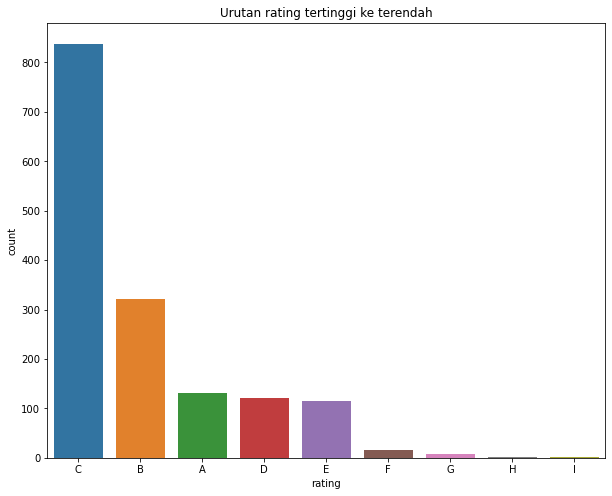

In [133]:
plt.figure(figsize=(10, 8))

sns.countplot(x=df.rating, order=df['rating'].value_counts().index)

plt.title('Urutan rating tertinggi ke terendah')

plt.show()

In [134]:
df

,title,genres,rating,action,film-noir,imax,crime,fantasy,children,comedy,...,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,C,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
1,Jumanji (1995),Adventure|Children|Fantasy,C,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,Grumpier Old Men (1995),Comedy|Romance,C,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,Father of the Bride Part II (1995),Comedy,D,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Sabrina (1995),Comedy|Romance,D,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,Game Night (2018),Action|Comedy|Crime|Horror,B,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1550,Tomb Raider (2018),Action|Adventure|Fantasy,E,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1551,Deadpool 2 (2018),Action|Comedy|Sci-Fi,C,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1552,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,C,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [135]:
df.iloc[:, 2].unique()

['C', 'D', 'B', 'F', 'A', 'E', 'G', 'H', 'I']
Categories (9, object): ['C', 'D', 'B', 'F', ..., 'E', 'G', 'H', 'I']

In [136]:
df.rating.dtypes

CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'], ordered=False)

In [137]:
df.corr()['action'].sort_values(ascending=False)

action         1.000000
sci-fi         0.365277
adventure      0.339228
thriller       0.174004
imax           0.136588
crime          0.112495
western        0.074515
war            0.062520
fantasy        0.020294
animation      0.016952
horror         0.002999
mystery       -0.031097
children      -0.045916
film-noir     -0.049715
musical       -0.085014
documentary   -0.088896
romance       -0.124505
comedy        -0.137419
drama         -0.216683
Name: action, dtype: float64

In [138]:
df.corr()

,action,film-noir,imax,crime,fantasy,children,comedy,musical,horror,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
action,1.000000,-0.049715,0.136588,0.112495,0.020294,-0.045916,-0.137419,-0.085014,0.002999,0.016952,0.339228,-0.031097,-0.124505,-0.088896,0.174004,0.062520,0.365277,-0.216683,0.074515
film-noir,-0.049715,1.000000,-0.020666,0.167438,-0.042417,-0.037163,-0.103853,-0.035211,-0.036521,-0.035432,-0.046280,0.132028,-0.024376,-0.031022,0.111970,-0.033401,-0.035215,0.004341,-0.018835
imax,0.136588,-0.020666,1.000000,-0.012993,0.100295,0.023751,-0.079061,0.007826,-0.014765,0.027952,0.214007,-0.025737,-0.051953,0.016834,-0.007627,-0.031815,0.167911,-0.092678,-0.017940
crime,0.112495,0.167438,-0.012993,1.000000,-0.076113,-0.073976,-0.051538,-0.076070,-0.031120,-0.068367,-0.079072,0.190688,-0.132904,-0.081869,0.252040,-0.052808,-0.094076,0.032750,-0.034561
fantasy,0.020294,-0.042417,0.100295,-0.076113,1.000000,0.315021,0.053884,0.080986,-0.019600,0.303207,0.276025,-0.017694,-0.006946,-0.060648,-0.070376,-0.054080,0.029842,-0.135441,-0.036823
children,-0.045916,-0.037163,0.023751,-0.073976,0.315021,1.000000,0.075576,0.155642,-0.062556,0.476190,0.282889,-0.047258,-0.068541,-0.053136,-0.114416,-0.057212,0.003791,-0.132217,-0.032261
comedy,-0.137419,-0.103853,-0.079061,-0.051538,0.053884,0.075576,1.000000,0.097336,-0.104618,0.034709,-0.034450,-0.125400,0.238914,-0.134938,-0.258695,-0.115532,-0.103983,-0.318146,-0.057574
musical,-0.085014,-0.035211,0.007826,-0.076070,0.080986,0.155642,0.097336,1.000000,-0.059270,0.167769,-0.013784,-0.062287,0.147775,-0.022121,-0.114985,-0.041011,-0.062258,-0.103998,0.014672
horror,0.002999,-0.036521,-0.014765,-0.031120,-0.019600,-0.062556,-0.104618,-0.059270,1.000000,-0.035411,-0.083694,0.093337,-0.118409,-0.052218,0.240409,-0.043450,0.061040,-0.136022,-0.031704
animation,0.016952,-0.035432,0.027952,-0.068367,0.303207,0.476190,0.034709,0.167769,-0.035411,1.000000,0.230568,-0.042427,-0.052641,-0.050660,-0.093974,-0.041425,0.086120,-0.140835,-0.030758


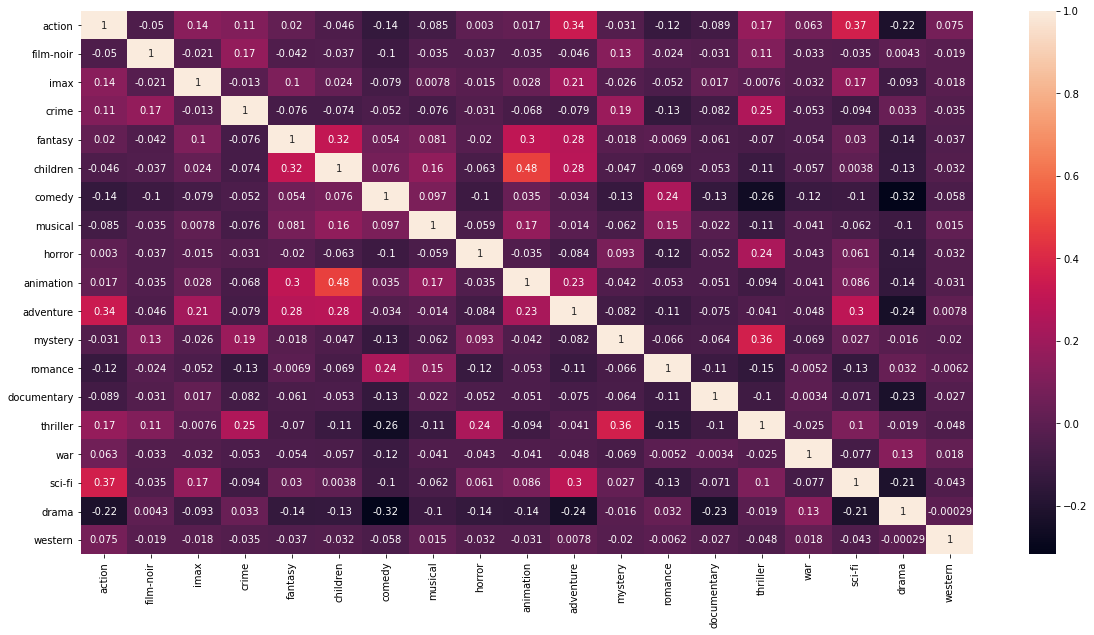

In [139]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)

plt.show()

In [140]:
X = df.drop(columns=['title', 'genres', 'rating'])


In [141]:
X.columns

Index(['action', 'film-noir', 'imax', 'crime', 'fantasy', 'children', 'comedy',
       'musical', 'horror', 'animation', 'adventure', 'mystery', 'romance',
       'documentary', 'thriller', 'war', 'sci-fi', 'drama', 'western'],
      dtype='object')

In [142]:
X.head()

,action,film-noir,imax,crime,fantasy,children,comedy,musical,horror,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [143]:
X.shape

(1554, 19)

In [144]:
y = df.iloc[:, 2]

In [145]:
y.dtype

CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'], ordered=False)

In [146]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# y = le.fit_transform(y)

In [147]:
from sklearn.preprocessing import LabelBinarizer

le = LabelBinarizer()
y = le.fit_transform(y)

In [148]:
print(y)

[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [149]:
# import collections, numpy
# a = numpy.array(y)
# counter = collections.Counter(a)
# print(counter)

In [150]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [156]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv1D, MaxPooling1D, Dropout, Flatten
from keras import optimizers

In [157]:

# model = Sequential(
#     [
#         Flatten(input_shape=(19,)),
#         Dense(19, activation="relu", name="layer1"),
#         Dense(32, activation="relu", name="layer2"),
#         Dense(64, activation="relu", name="layer3"),
#         Dense(1024, activation="relu", name="layer4"),
#         Dropout(0.4),
#         Dense(64, activation="relu", name="layer5"),
#         Dropout(0.3),
#         Dense(32, activation="relu", name="layer6"),
#         Dropout(0.2),
#         Dense(9, activation = "softmax", name="layer7"),
#     ]
# )

In [ ]:
#  model.add(Conv1D(20, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_size=2, strides=1, padding='same'))
#     model.add(Activation('relu'))
    
#     model.add(Conv1D(40, kernel_size=2, strides=1, padding='same'))
#     model.add(Activation('relu'))
    
#     model.add(Flatten())
    
#     model.add(Dense(128))
#     model.add(Activation('relu'))
    
#     model.add(Dense(64))
#     model.add(Activation('relu'))

In [161]:
model = Sequential()
    
model.add(Conv1D(20, input_shape=(19,), kernel_size=2, strides=1, padding='same'))
model.add(Activation('relu'))
    
model.add(Conv1D(40, kernel_size=2, strides=1, padding='same'))
model.add(Activation('relu'))
    
model.add(Flatten())
    
model.add(Dense(128))
model.add(Activation('relu'))
    
model.add(Dense(64))
model.add(Activation('relu'))
    
model.add(Dense(32))
model.add(Activation('relu'))
    
model.add(Dense(9))
model.add(Activation('softmax'))

ValueError: Input 0 of layer "conv1d_3" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 19)

In [162]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [153]:
from tensorflow.keras.optimizers import SGD

print("[INFO] training network...")
opt = SGD(learning_rate=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32)

[INFO] training network...
Epoch 1/200
39/39 [==============================] - 1s 9ms/step - loss: 2.1877 - accuracy: 0.1263 - val_loss: 2.1769 - val_accuracy: 0.2444
Epoch 2/200
39/39 [==============================] - 0s 4ms/step - loss: 2.1672 - accuracy: 0.2422 - val_loss: 2.1566 - val_accuracy: 0.4855
Epoch 3/200
39/39 [==============================] - 0s 3ms/step - loss: 2.1495 - accuracy: 0.3516 - val_loss: 2.1375 - val_accuracy: 0.5498
Epoch 4/200
39/39 [==============================] - 0s 3ms/step - loss: 2.1314 - accuracy: 0.4481 - val_loss: 2.1191 - val_accuracy: 0.5531
Epoch 5/200
39/39 [==============================] - 0s 3ms/step - loss: 2.1120 - accuracy: 0.4948 - val_loss: 2.1009 - val_accuracy: 0.5531
Epoch 6/200
39/39 [==============================] - 0s 3ms/step - loss: 2.0945 - accuracy: 0.5141 - val_loss: 2.0829 - val_accuracy: 0.5531
Epoch 7/200
39/39 [==============================] - 0s 3ms/step - loss: 2.0796 - accuracy: 0.5181 - val_loss: 2.0648 - val_acc

39/39 [==============================] - 0s 3ms/step - loss: 1.4575 - accuracy: 0.5334 - val_loss: 1.3932 - val_accuracy: 0.5531
Epoch 59/200
39/39 [==============================] - 0s 3ms/step - loss: 1.4635 - accuracy: 0.5334 - val_loss: 1.3910 - val_accuracy: 0.5531
Epoch 60/200
39/39 [==============================] - 0s 3ms/step - loss: 1.4512 - accuracy: 0.5366 - val_loss: 1.3888 - val_accuracy: 0.5531
Epoch 61/200
39/39 [==============================] - 0s 3ms/step - loss: 1.4624 - accuracy: 0.5342 - val_loss: 1.3869 - val_accuracy: 0.5531
Epoch 62/200
39/39 [==============================] - 0s 3ms/step - loss: 1.4391 - accuracy: 0.5342 - val_loss: 1.3849 - val_accuracy: 0.5531
Epoch 63/200
39/39 [==============================] - 0s 3ms/step - loss: 1.4406 - accuracy: 0.5302 - val_loss: 1.3830 - val_accuracy: 0.5531
Epoch 64/200
39/39 [==============================] - 0s 3ms/step - loss: 1.4508 - accuracy: 0.5358 - val_loss: 1.3814 - val_accuracy: 0.5531
Epoch 65/200
39/39 

Epoch 116/200
39/39 [==============================] - 0s 3ms/step - loss: 1.4097 - accuracy: 0.5278 - val_loss: 1.3517 - val_accuracy: 0.5531
Epoch 117/200
39/39 [==============================] - 0s 3ms/step - loss: 1.4077 - accuracy: 0.5342 - val_loss: 1.3515 - val_accuracy: 0.5531
Epoch 118/200
39/39 [==============================] - 0s 3ms/step - loss: 1.4272 - accuracy: 0.5286 - val_loss: 1.3514 - val_accuracy: 0.5531
Epoch 119/200
39/39 [==============================] - 0s 3ms/step - loss: 1.4086 - accuracy: 0.5342 - val_loss: 1.3512 - val_accuracy: 0.5531
Epoch 120/200
39/39 [==============================] - 0s 3ms/step - loss: 1.3904 - accuracy: 0.5334 - val_loss: 1.3509 - val_accuracy: 0.5531
Epoch 121/200
39/39 [==============================] - 0s 3ms/step - loss: 1.4058 - accuracy: 0.5278 - val_loss: 1.3507 - val_accuracy: 0.5531
Epoch 122/200
39/39 [==============================] - 0s 3ms/step - loss: 1.4078 - accuracy: 0.5358 - val_loss: 1.3505 - val_accuracy: 0.5531

39/39 [==============================] - 0s 4ms/step - loss: 1.3964 - accuracy: 0.5326 - val_loss: 1.3434 - val_accuracy: 0.5531
Epoch 174/200
39/39 [==============================] - 0s 4ms/step - loss: 1.3832 - accuracy: 0.5334 - val_loss: 1.3432 - val_accuracy: 0.5531
Epoch 175/200
39/39 [==============================] - 0s 4ms/step - loss: 1.3892 - accuracy: 0.5270 - val_loss: 1.3431 - val_accuracy: 0.5531
Epoch 176/200
39/39 [==============================] - 0s 4ms/step - loss: 1.3866 - accuracy: 0.5326 - val_loss: 1.3430 - val_accuracy: 0.5531
Epoch 177/200
39/39 [==============================] - 0s 4ms/step - loss: 1.3786 - accuracy: 0.5334 - val_loss: 1.3428 - val_accuracy: 0.5531
Epoch 178/200
39/39 [==============================] - 0s 4ms/step - loss: 1.4089 - accuracy: 0.5278 - val_loss: 1.3428 - val_accuracy: 0.5531
Epoch 179/200
39/39 [==============================] - 0s 4ms/step - loss: 1.3989 - accuracy: 0.5334 - val_loss: 1.3427 - val_accuracy: 0.5531
Epoch 180/200

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


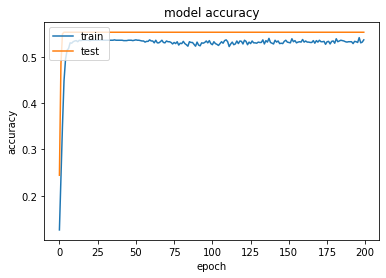

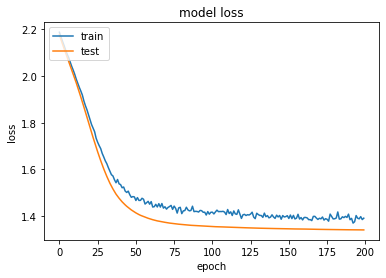

In [154]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()